In [4]:
import cieran

In [167]:
## autoreload
%load_ext autoreload
%autoreload 2
import cieran
import numpy as np
import matplotlib.pyplot as plt

def draw_chart(cmap):

    t = np.linspace(0, 2 * np.pi, 1024)
    data2d = np.sin(t)[:, np.newaxis] * np.cos(t)[np.newaxis, :]
    # Draw a chart of data2d with the given colormap
    fig, ax = plt.subplots()
    ax.imshow(data2d, cmap=cmap)

    plt.show()

env = cieran.query([48.325, -19.2993, -16.5717], render=draw_chart)

Estimated user parameters: {'weights': array([ 0.18317659,  0.84481028, -0.1860568 ,  0.46703832])}


In [197]:
env.reward_weights

array([ 0.18317659,  0.84481028, -0.1860568 ,  0.46703832])

In [235]:
from collections import defaultdict
import networkx as nx
path = nx.shortest_path(env.graph, source=(100, 0, 0), target=(0,0,0))

env.discount=0.95
env.lr = 0.1
env.Q = defaultdict(float)

for i in range(len(path)-1):
    env.Q[(path[i], path[i+1])] = 1.0
    
# env.Q.default_factory = lambda: 5.0
print(env.Q)
env.epsilon = 0.1
cmap, history, reward_history = cieran.train(env)

defaultdict(<class 'float'>, {((100, 0, 0), (67.24218460110536, -11.490351548099511, -28.993949226740384)): 1.0, ((67.24218460110536, -11.490351548099511, -28.993949226740384), (0, 0, 0)): 1.0})
Learning...


In [230]:
import networkx as nx
nx.shortest_path(env.graph, source=(100.0, 0.0, 0.0), target=(0.0,0.0,0.0))

[(100.0, 0.0, 0.0),
 (67.24218460110536, -11.490351548099511, -28.993949226740384),
 (0.0, 0.0, 0.0)]

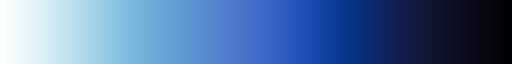

In [223]:
cmap

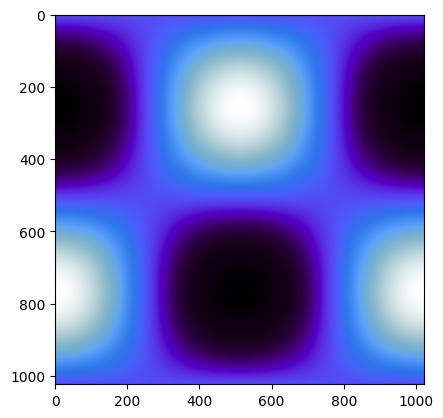

In [237]:
draw_chart(cmap)

In [150]:
history[-1]

[(100, 0, 0),
 (89.84350296048036, -41.313549231379525, -3.3715492267403846),
 (88.45800491360536, -38.191311767578256, -16.215389226740385),
 (82.54980178860536, -30.262642357427353, -20.866589226740402),
 (80.12060256985536, -28.785733349654166, -28.732829226740378),
 (77.12987991360536, -22.450571026837522, -33.759389226740396),
 (76.43407913235536, -9.469318169041458, -34.93442922674039),
 (67.29101272610536, -16.555890337918157, -20.344349226740377),
 (67.24218460110536, -11.490351548099511, -28.993949226740384),
 (60.79687210110536, -4.144672535753841, -20.01794922674037),
 (57.97704788235536, -10.168906646407706, -25.79522922674039),
 (56.75634475735536, -7.603748896064758, -31.392989226740397),
 (50.72607131985536, -2.6677635279806253, -29.304029226740383),
 (49.26122756985536, 0.5969826997285566, -35.6688292267404),
 (47.88183303860536, -2.6288975014602727, -37.757789226740414),
 (46.03857131985536, -8.96405982427693, -41.46242922674038),
 (39.54443069485536, 3.162140450071518

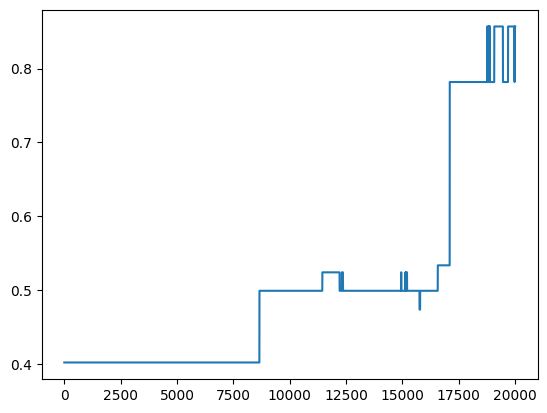

In [236]:
plt.plot(reward_history)

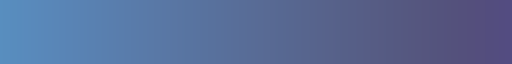

In [320]:
cmap

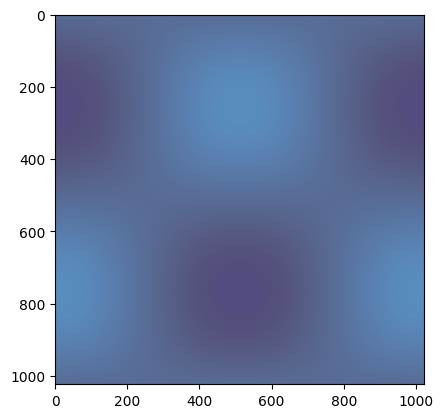

In [321]:
draw_chart(cmap)

In [187]:
history[-1]

[(100, 0, 0),
 (95.35497756985536, -1.8515769710533334, -0.3360292267404219),
 (86.19970413235536, -6.6709642595764365, -10.6992292267404),
 (77.58154006985536, -13.86117916584071, -21.960029226740374),
 (67.29101272610536, -16.555890337918157, -20.344349226740377),
 (56.67089553860536, -22.21737486771542, -22.25378922674038),
 (47.02123733548036, -15.19557940970597, -25.289309226740386),
 (34.29540725735536, -4.805394986599751, -26.2521892267404),
 (0, 0, 0)]

In [8]:
import networkx as nx
distance(nx.dag_longest_path(env.graph))

414.48168477836606

In [7]:
def distance(trajectory):
    # Compute euclidean distance between points
    return sum([np.sqrt((trajectory[i+1][0] - trajectory[i][0])**2 + (trajectory[i+1][1] - trajectory[i][1])**2 + (trajectory[i+1][2] - trajectory[i][2])**2) for i in range(len(trajectory) - 1)])


In [90]:
env.run()
print(env.trajectory)
env.reset()

[(100, 0, 0), (67.24218460110536, -11.490351548099511, -28.993949226740384), (56.75634475735536, -7.603748896064758, -31.392989226740397), (52.34350296048036, -12.980215898046183, -36.0115492267404), (0, 0, 0)]


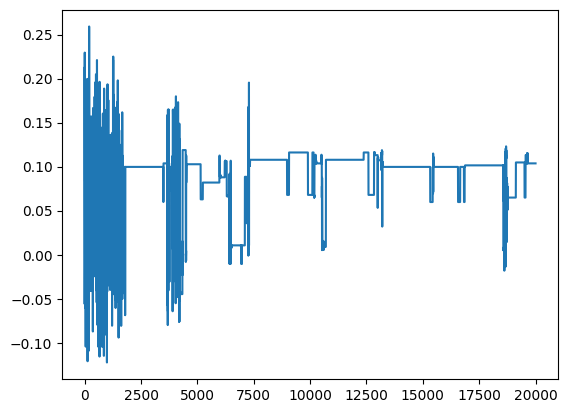

In [322]:
plt.plot(reward_history)

In [28]:
reward_history[900]

0.8443879585272268

In [29]:
history[900]

[(100, 0, 0),
 (80.32812210110536, 6.349154624739981, 22.822050773259548),
 (75.90917678860536, -6.126839888291556, 0.34941077325959213),
 (67.24218460110536, -11.490351548099511, -28.993949226740384),
 (63.79980178860536, -1.9293090240940245, -51.466589226740396),
 (51.58056350735536, 8.953178401603282, -64.84898922674041),
 (44.72021194485536, 34.99341617023612, -82.18082922674043),
 (29.302731476105357, 59.116263297198486, -83.01314922674041),
 (0, 0, 0)]

In [23]:
reward_history[581]

0.2007705868712833

In [21]:
history[581]

[(100, 0, 0),
 (89.03173538235536, 16.065661254826892, -13.555229226740394),
 (78.49706741360536, 3.4342026357139446, -25.109789226740403),
 (77.58154006985536, -13.86117916584071, -21.960029226740374),
 (67.29101272610536, -16.555890337918157, -20.344349226740377),
 (67.24218460110536, -11.490351548099511, -28.993949226740384),
 (64.20873733548036, -5.05154648789528, -33.44930922674038),
 (57.80614944485536, -1.151988493687071, -40.564829226740386),
 (47.88183303860536, -2.6288975014602727, -37.757789226740414),
 (37.44482131985536, -16.309738836622614, -23.18402922674038),
 (37.39599319485536, -10.829629097253616, -31.833629226740385),
 (29.864254913605357, -8.808595718195534, -22.33538922674039),
 (24.566403351105357, 1.4002139144824355, -22.22114922674038),
 (23.583737335480357, -14.495990932339737, -13.049309226740377),
 (12.77441116360536, -5.31065333136425, -13.767389226740391),
 (0, 0, 0)]

In [15]:
viridis = plt.get_cmap('viridis', 255)

<IPython.core.display.Javascript object>


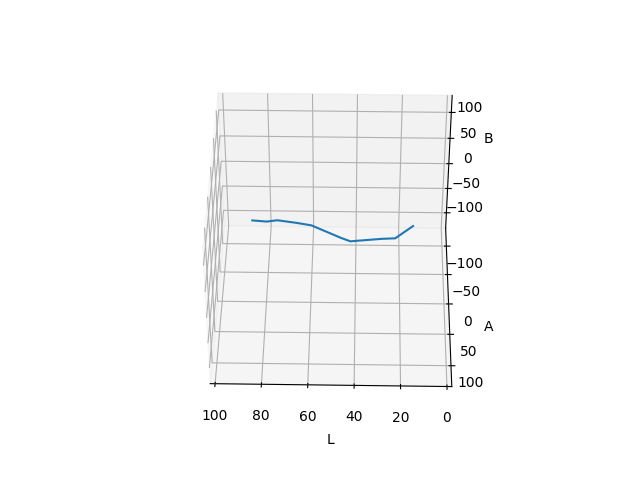

In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create a 3D line chart
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ramp = np.array(history[0][1:-1])
line, = ax.plot(ramp[:,0], ramp[:,1], ramp[:,2])

ax.set_xlabel('L')
ax.set_ylabel('A')
ax.set_zlabel('B')
              
ax.set_xlim(0, 100)
ax.set_ylim(-127, 127)
ax.set_zlim(-127, 127)

# Define the update function
def update(i):
    # Generate new data
    ramp = np.array(history[i][1:-1])

    # Update the line chart data
    line.set_data(ramp[:,0], ramp[:,1])
    line.set_3d_properties(ramp[:,2])

    # Return the updated plot objects
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=1000, interval=10, blit=True)

# Show the plot
plt.show()


In [12]:
history[-1]

[(100, 0, 0),
 (88.63078380106899, -54.14830654646491, 25.778645014479054),
 (86.29313731669399, -53.047102461721735, 7.647125014479002),
 (79.76847911356899, -49.277097889248026, 10.22568501447904),
 (73.33537364481899, -47.23015382584306, 10.845845014479039),
 (71.16252208231899, -43.46014925336934, -2.0306349855209618),
 (61.88517833231899, -38.446431832244514, -3.009834985520982),
 (59.80998301981899, -28.807657255198336, -10.02743498552097),
 (53.99943614481899, -26.242499504855402, -19.264554985520988),
 (52.52238536356899, -21.293558794597814, -22.577514985520978),
 (46.52873301981899, -16.21506466260574, -19.81943498552097),
 (39.88810801981899, -12.36732803709134, -7.987434985520977),
 (28.68205333231899, -14.310629363108717, -18.513834985520973),
 (21.17472911356899, -9.400554679371481, -18.742314985520977),
 (10.93302989481899, -3.7390701495742036, -18.04055498552097),
 (0, 0, 0)]

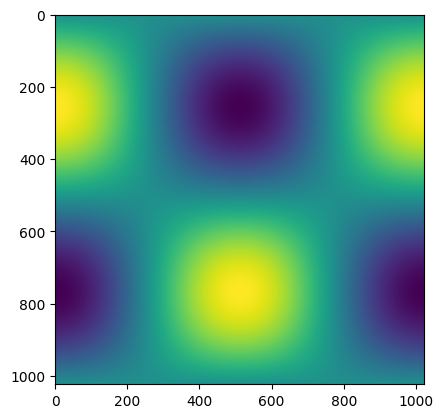

In [17]:
draw_chart(viridis)

In [ ]:
# Draw a random plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from ipywidgets import Output, Tab

# Show random data
x = np.linspace(0, 10, 100)
y = np.random.rand(100)

# Create a figure and show
def chart():
    plt.scatter(x, y)
    plt.show()

# Create an output widget
out = Output()
display(out)

with out:
    # Display the figure
    plt.scatter(x, y)
    plt.show()

In [ ]:
from IPython.display import clear_output
with out:
    clear_output()

<IPython.core.display.Javascript object>


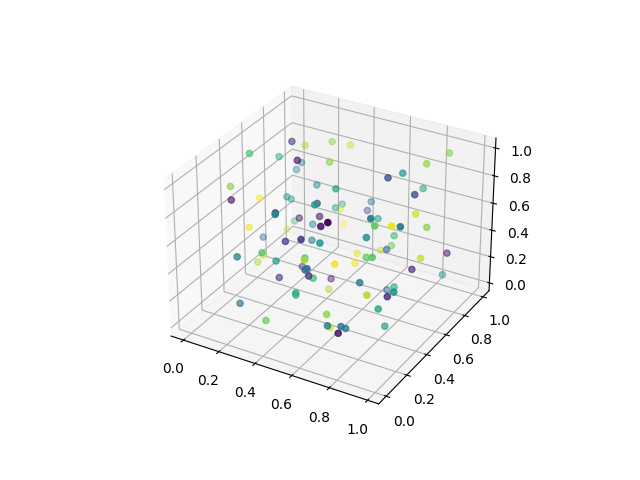

In [22]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Generate initial data
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)
c = np.random.rand(100)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=c)

# Define the update function
def update(i):
    # Generate new data
    x = np.random.rand(100)
    y = np.random.rand(100)
    z = np.random.rand(100)
    c = np.random.rand(100)

    # Update the scatter plot data
    scatter._offsets3d = (x, y, z)
    scatter.set_array(c)

    # Return the updated plot objects
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=10, interval=10, blit=True)

# Show the plot
plt.show()
